In [ ]:
import pandas as pd 
import os
from sqlalchemy  import create_engine
import logging
import time



logging.basicConfig(
    filename="logs/ingestion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

In [ ]:
engine = create_engine('sqlite:///inventory.db')

In [ ]:
def infile_db(df , table_name, engine):
    df.to_sql(table_name,con= engine , if_exists ='replace', index=False)

In [ ]:
import time
import os
import pandas as pd
import logging



def load_raw_data():
    # This fxn will load csv as dataframe and ingest into db
    start = time.time()
    
    # 1. Loop through files
    for file in os.listdir('data'):
        if '.csv' in file:
            # 2. Construct path and read file
            df = pd.read_csv(f'data/{file}')
            logging.info(f'Ingesting {file} in db')
            
            # 3. Call your db function (Ensure 'engine' is defined globally or passed in)
            infile_db(df, file[:-4], engine)
            
    # 4. Calculate time AFTER the loop finishes
    end = time.time()
    
    # Correction: Use parentheses to subtract before dividing
    total_time = (end - start) / 60 
    
    logging.info('----Ingestion Complete-----------')
    
     
    logging.info(f'\nTotal Time taken in minutes: {total_time:.2f} minutes')

if __name__=='__main__':
    load_raw_data()

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn= sqlite3.connect('inventory.db')

In [3]:
tables=pd.read_sql_query("SELECT name FROM  sqlite_master WHERE type='table' ",conn)
tables

,name
0,begin_inventory
1,end_inventory
2,purchases
3,purchase_prices
4,sales
5,vendor_invoice
6,vendor_sales_summary1
7,vendor_sales_summary2
8,vendor_sales_summary


In [4]:
pd.read_sql("select count(*) from purchases",conn)

,count(*)
0,2372474


In [5]:
purchases = pd.read_sql_query("select* from purchases where VendorNumber=4466",conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [6]:
purchases.groupby(['Brand', 'PurchasePrice'])[['Quantity', 'Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [7]:
# Load the table from the database into a variable
purchase_prices = pd.read_sql("SELECT * FROM purchase_prices", conn)
purchase_prices



,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.
...,...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS


In [8]:
sales=pd.read_sql("SELECT * FROM sales", conn)
sales.groupby('Brand')[['SalesDollars','SalesPrice','SalesQuantity']].sum()


,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
58,43341.54,28145.64,3446
60,18716.25,10720.79,1775
61,4364.88,363.74,312
62,119863.75,90154.51,3125
63,112249.22,88553.10,2778
...,...,...,...
90089,19078.41,5759.52,159
90090,9749.85,4549.93,15
90604,9119.24,2639.78,76


In [9]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [10]:
vendor_invoice = pd.read_sql("SELECT * FROM vendor_invoice", conn)
vendor_invoice.columns


Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [11]:
freight_summary = pd.read_sql_query("""
    SELECT VendorNumber, SUM(Freight) as FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
""", conn)

freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [12]:
pd.read_sql_query("""
    SELECT 
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.PurchasePrice,
        pp.Volume,
        pp.Price as ActualPrice,
        SUM(p.Quantity) as TotalPurchaseQuantity,
        SUM(p.Dollars) as TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp
    ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand
    ORDER BY TotalPurchaseDollars
""", conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [13]:
pd.read_sql_query("""SELECT 
    VendorNo,
    Brand,
    SUM(SalesDollars) as TotalSalesDollars,
    SUM(SalesPrice) as TotalSalesPrice,
    SUM(SalesQuantity) as TotalSalesQuanity,
    SUM(ExciseTax) as TotalExciseTax
    FROM sales
    GROUP BY VendorNo, Brand
    ORDER BY TotalSalesDollars""", conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuanity,TotalExciseTax
0,8004,5287,0.98,0.98,2,0.10
1,9206,2773,0.99,0.99,1,0.05
2,3252,3933,1.98,0.99,2,0.10
3,3924,9123,1.98,0.99,2,0.10
4,10050,3623,1.98,1.98,2,0.10
...,...,...,...,...,...,...
11267,3960,3545,4223107.62,545778.28,135838,249587.83
11268,3960,4261,4475972.88,420050.01,200412,368242.80
11269,17035,8068,4538120.60,461140.15,187140,343854.07
11270,4425,3405,4819073.49,561512.37,160247,294438.66


In [14]:
vendor_sales_summary = pd.read_sql_query(
    """
    WITH FreightSummary AS (
        SELECT
            VendorNumber,
            SUM(Freight) AS FreightCost
        FROM vendor_invoice
        GROUP BY VendorNumber
    ),
    PurchaseSummary AS (
        SELECT
            p.VendorNumber,
            p.VendorName,
            p.Brand,
            p.Description,
            p.PurchasePrice,
            pp.Price AS ActualPrice,
            pp.Volume,
            SUM(p.Quantity) AS TotalPurchaseQuantity,
            SUM(p.Dollars) AS TotalPurchaseDollars
        FROM purchases p
        JOIN purchase_prices pp
            ON p.Brand = pp.Brand
        WHERE p.PurchasePrice > 0
        GROUP BY
            p.VendorNumber,
            p.VendorName,
            p.Brand,
            p.Description,
            p.PurchasePrice,
            pp.Price,
            pp.Volume
    ),
    SalesSummary AS (
        SELECT
            VendorNo,
            Brand,
            SUM(SalesQuantity) AS TotalSalesQuantity,
            SUM(SalesDollars) AS TotalSalesDollars,
            SUM(SalesPrice) AS TotalSalesPrice,
            SUM(ExciseTax) AS TotalExciseTax
        FROM sales
        GROUP BY
            VendorNo,
            Brand
    )
    SELECT
        ps.VendorNumber,
        ps.VendorName,
        ps.Brand,
        ps.Description,
        ps.PurchasePrice,
        ps.ActualPrice,
        ps.Volume,
        ps.TotalPurchaseQuantity,
        ps.TotalPurchaseDollars,
        ss.TotalSalesQuantity,
        ss.TotalSalesDollars,
        ss.TotalSalesPrice,
        ss.TotalExciseTax,
        fs.FreightCost
    FROM PurchaseSummary ps
    LEFT JOIN SalesSummary ss
        ON ps.VendorNumber = ss.VendorNo
        AND ps.Brand = ss.Brand
    LEFT JOIN FreightSummary fs
        ON ps.VendorNumber = fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC
    """,
    conn
)


In [15]:
# vendor_sales_summary = pd.read_sql("SELECT * FROM vendor_sales_summary", conn)
# vendor_sales_summary.columns

In [16]:

# vendor_sales_summary.to_sql("vendor_sales_summary", conn, if_exists="replace", index=False)
# df = pd.read_sql("SELECT * FROM vendor_sales_summary", conn)
# print(df.columns)


In [17]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,15.95,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,65.66,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2.0,1.98,0.99,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72.0,143.28,77.61,15.12,257032.07


In [18]:
# Performance Optimization:

# The query involves heavy joins and aggregations on large datasets like sales and purchases.

# Storing the pre-aggregated results avoids repeated expensive computations.

# Helps in analyzing sales, purchases, and pricing for different vendors and brands.

# Future benefits of storing this data include faster dashboarding and reporting.

# Instead of running expensive queries each time, dashboards can fetch data quickly from

In [19]:
vendor_sales_summary.isnull().sum()

VendorNumber               0
VendorName                 0
Brand                      0
Description                0
PurchasePrice              0
ActualPrice                0
Volume                     0
TotalPurchaseQuantity      0
TotalPurchaseDollars       0
TotalSalesQuantity       178
TotalSalesDollars        178
TotalSalesPrice          178
TotalExciseTax           178
FreightCost                0
dtype: int64

In [20]:
vendor_sales_summary['Volume']=vendor_sales_summary['Volume'].astype('float64')
vendor_sales_summary.fillna(0,inplace=True)

In [21]:
vendor_sales_summary['VendorName']=vendor_sales_summary['VendorName'].str.strip()

In [22]:
vendor_sales_summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                   float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [23]:
vendor_sales_summary['Gross Profit']= vendor_sales_summary['TotalSalesDollars']- vendor_sales_summary['TotalPurchaseDollars']

In [24]:
vendor_sales_summary['Gross Profit'].min()

np.float64(-52002.780000000006)

In [25]:
vendor_sales_summary['ProfitMargin'] = (
    vendor_sales_summary['Gross Profit'] / vendor_sales_summary['TotalSalesDollars']
) * 100

vendor_sales_summary['StockTurnover'] = (
    vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']
)

vendor_sales_summary['SalestoPurchaseRatio'] = (
    vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']
)
vendor_sales_summary['ProfitMargin']=vendor_sales_summary['ProfitMargin']
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['StockTurnover'] 
vendor_sales_summary['SalestoPurchaseRatio']=vendor_sales_summary['SalestoPurchaseRatio']

In [26]:
vendor_sales_summary.to_sql(
    "vendor_sales_summary",
    conn,
    if_exists="replace",
    index=False
)


10692

In [27]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'Gross Profit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [28]:
cursor=conn.cursor()

In [32]:
cursor.execute("DROP TABLE IF EXISTS vendor_sales_summary;")
cursor.execute("""
CREATE TABLE vendor_sales_summary (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand INT,
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    ActualPrice DECIMAL(10,2),
    Volume INT,
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(15,2),
    TotalSalesQuantity INT,
    TotalSalesDollars DECIMAL(15,2),
    TotalSalesPrice DECIMAL(15,2),
    TotalExciseTax DECIMAL(15,2),
    FreightCost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(15,2),
    StockTurnover DECIMAL(15,2),
    SalesToPurchaseRatio DECIMAL(15,2),
    PRIMARY KEY (VendorNumber, Brand)
);
""")


In [33]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [ ]:
# cursor.execute("""
# INSERT INTO vendor_sales_summary2
# SELECT *
# FROM vendor_sales_summary;
# """)

# conn.commit()



VENDOR PERFORMANCE ANALYSIS

In [40]:
import pandas as pd 
import numpy as np 
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')

# Loading the dataset


# fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary",conn)

df.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [35]:
vendor_sales_summary.to_sql(
    'vendor_sales_summary',
    conn,
    if_exists='replace',
    index=False
)


10692

In [39]:
vendor_sales_summary.to_sql(
    'vendor_sales_summary',
    conn,
    if_exists='replace',
    index=False
)


10692

In [ ]:
# vendor_sales_summary['ProfitMargin'] = (
#     vendor_sales_summary['Gross Profit'] / vendor_sales_summary['TotalSalesDollars']
# ) * 100

# vendor_sales_summary['StockTurnover'] = (
#     vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']
# )

# vendor_sales_summary['SalestoPurchaseRatio'] = (
#     vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']
# )
# vendor_sales_summary['ProfitMargin']=vendor_sales_summary['ProfitMargin']
# vendor_sales_summary['StockTurnover'] = vendor_sales_summary['StockTurnover'] 
# vendor_sales_summary['SalestoPurchaseRatio']=vendor_sales_summary['SalestoPurchaseRatio']

In [36]:
vendor_sales_summary.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [ ]:
# df.to_sql(
#     'vendor_sales_summary',
#     conn,
#     if_exists='append',   # append the data into the existing table
#     index=False
# )


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [ ]:
# df1.head()

In [ ]:
vendor_sales_summary.dtypes

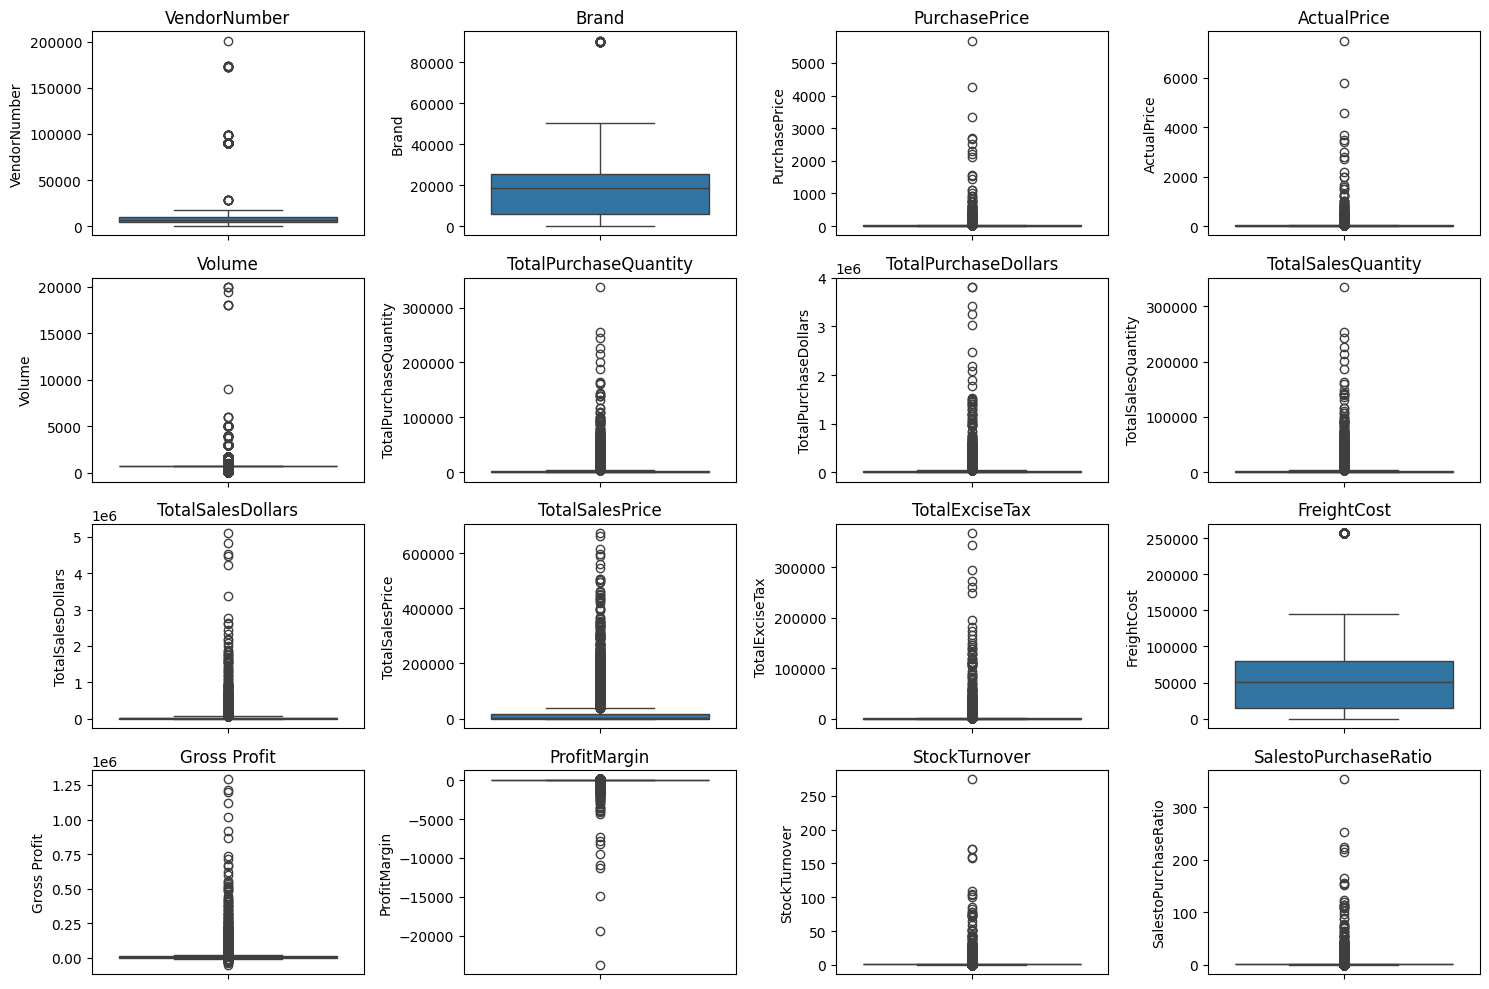

In [43]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
df1.dtypes

In [ ]:
df1=vendor_sales_summary

In [ ]:
df1.describe().T

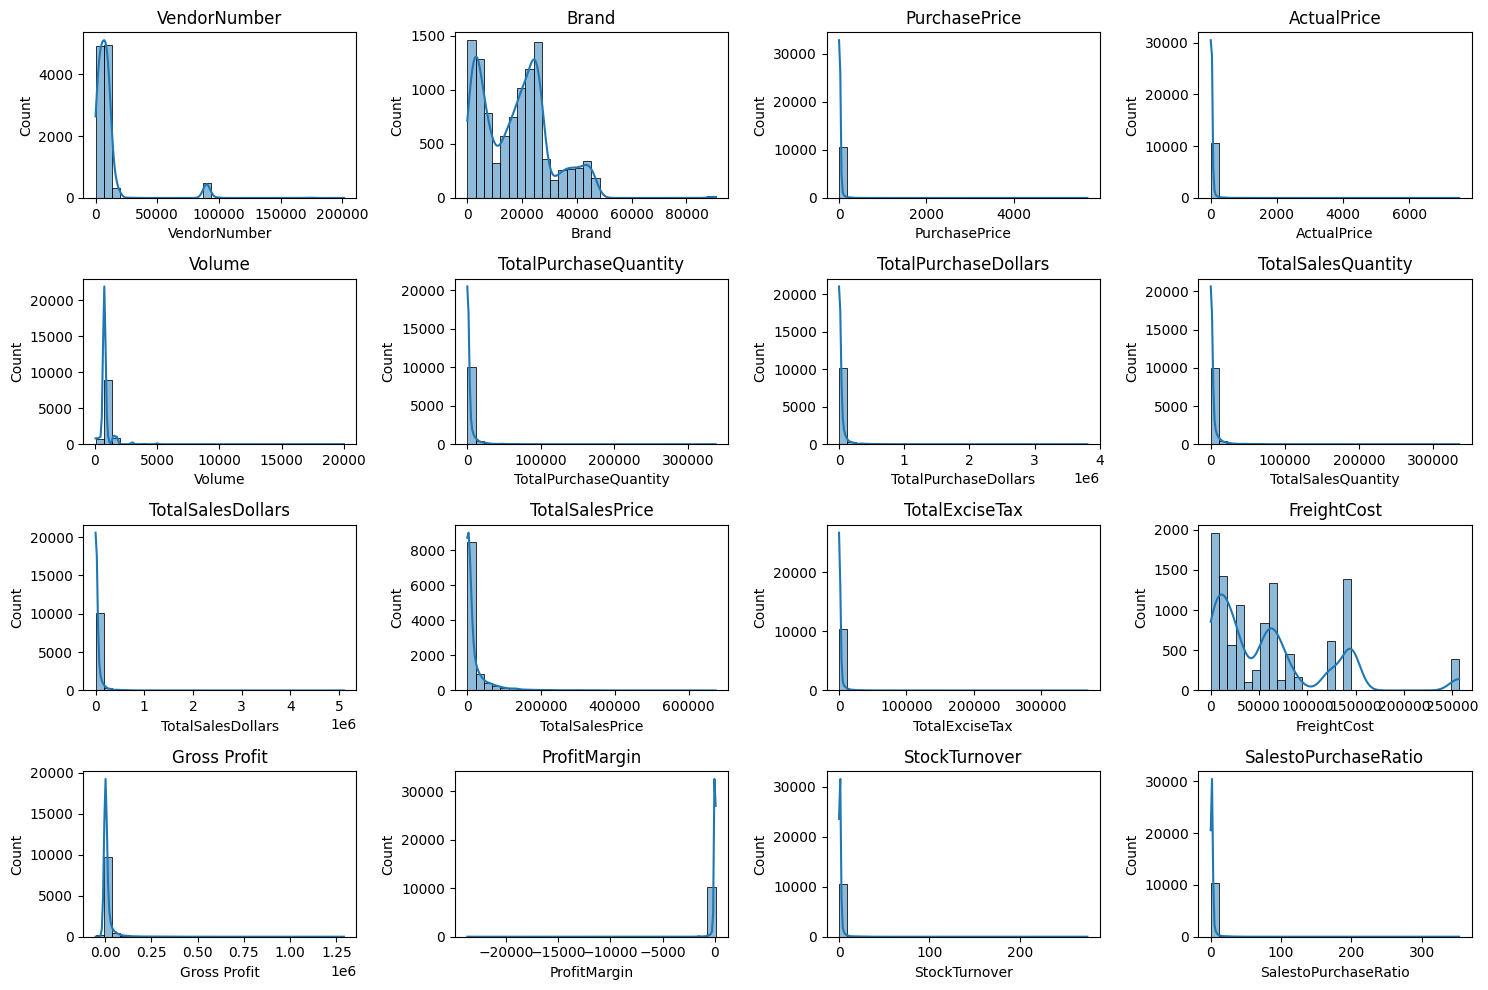

In [44]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


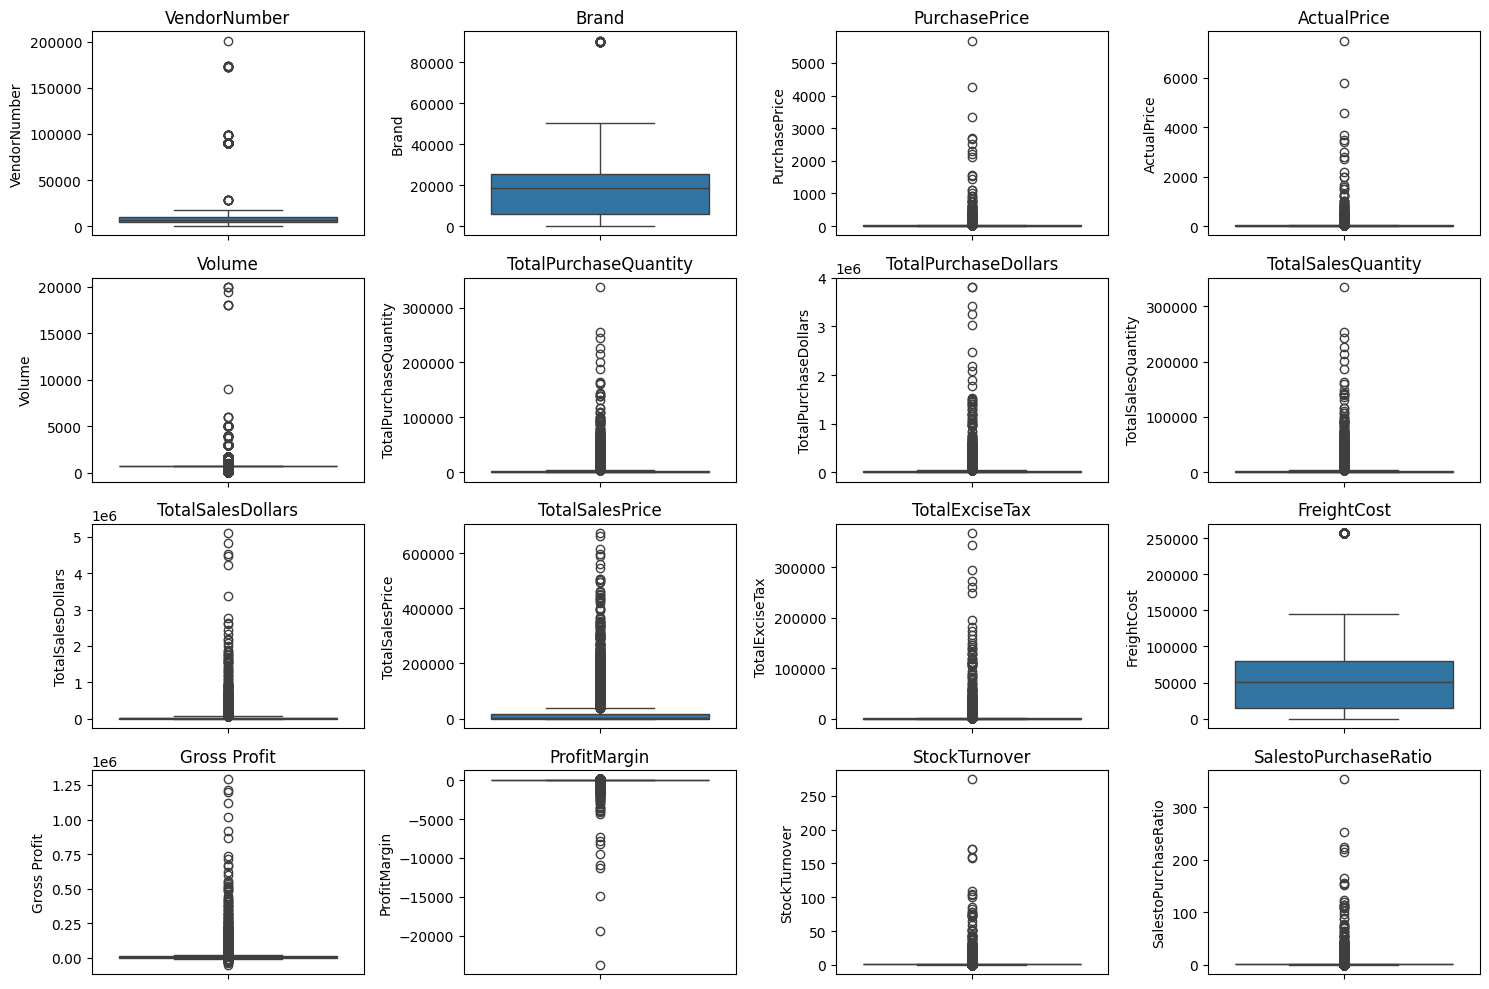

In [45]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)        # 4x4 grid, adjust as needed
    sns.boxplot(y=df[col])          # boxplot for each numerical column
    plt.title(col)

plt.tight_layout()
plt.show()


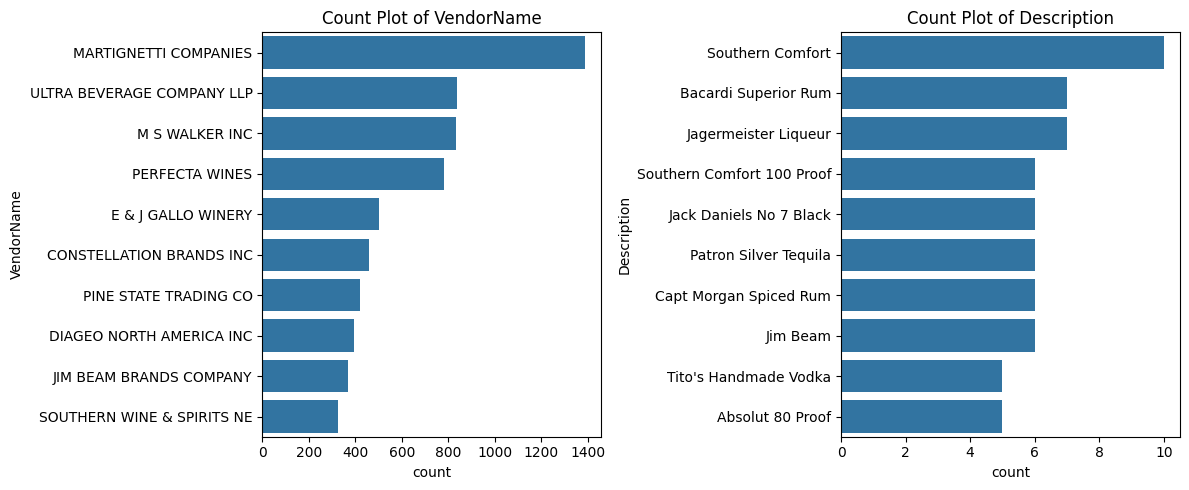

In [46]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()


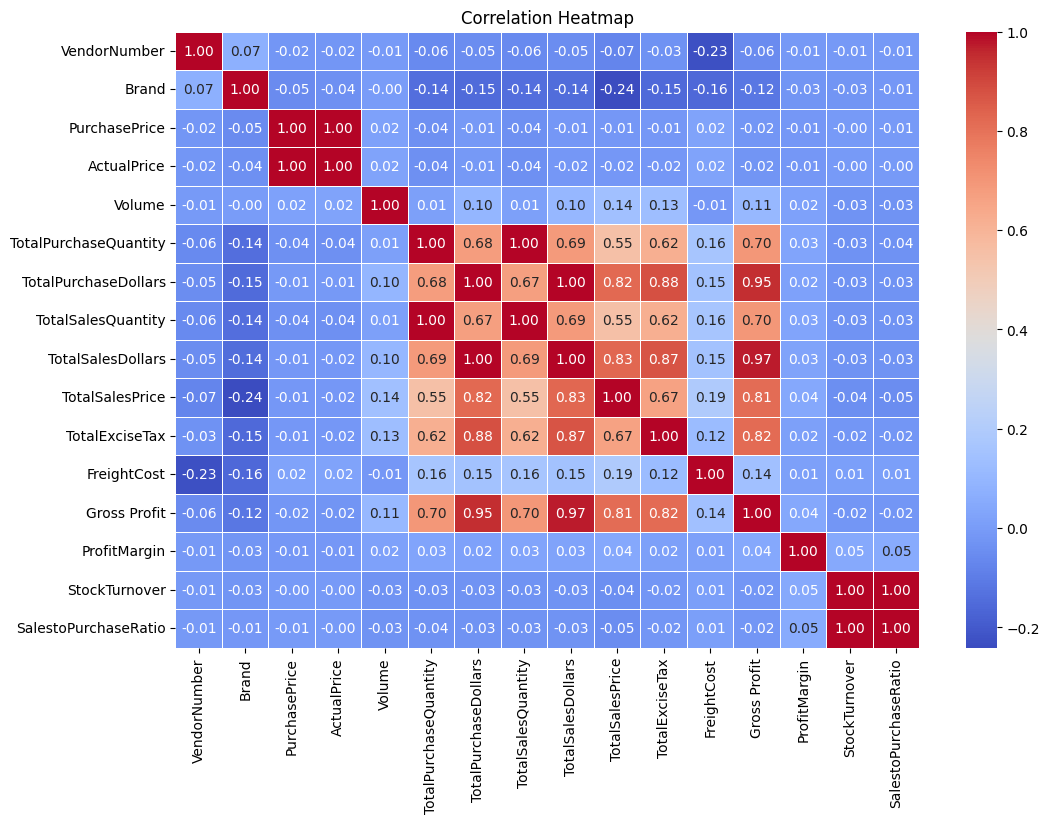

In [47]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [48]:
# Group performance by product description (brand/category)
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

# Calculate thresholds
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)   # Bottom 15% sales
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)     # Top 15% margins

# Show thresholds
print("Low Sales Threshold:", low_sales_threshold)
print("High Profit Margin Threshold:", high_margin_threshold)

# Filter brands: low sales + high profit margin
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))


Low Sales Threshold: 286.185
High Profit Margin Threshold: 56.198056057839054
Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
7777,Santa Rita Organic Svgn Bl,9.99,66.466466
2896,Debauchery Pnt Nr,11.58,65.975820
2537,Concannon Glen Ellen Wh Zin,15.95,83.448276
2677,Crown Royal Apple,27.86,89.806174
7818,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
8939,Tommasi Poggio Tufo Cab Svgn,269.73,74.789604
9229,Vigne A Porrona Rosso,272.79,96.825397
3980,Gifft Chardonnay,279.80,94.245890
5736,Mad Dogs & Englishmen Jumil,279.80,97.666190


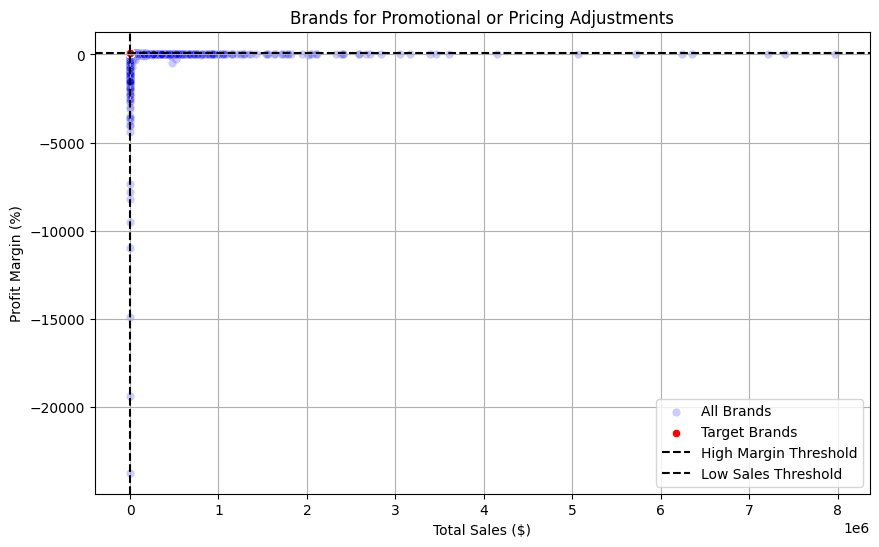

In [49]:
plt.figure(figsize=(10, 6))

# Scatter plot for all brands
sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    label="All Brands",
    alpha=0.2
)

# Scatter plot for target brands (low sales + high margin)
sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="red",
    label="Target Brands"
)

# Threshold lines
plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

# Labels and title
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")

plt.legend()
plt.grid(True)
plt.show()


In [50]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)


In [51]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

top_vendors


VendorName
DIAGEO NORTH AMERICA INC      68739834.97
MARTIGNETTI COMPANIES         40960117.82
PERNOD RICARD USA             32279544.17
JIM BEAM BRANDS COMPANY       31898621.16
BACARDI USA INC               25005365.79
CONSTELLATION BRANDS INC      24467134.23
E & J GALLO WINERY            18553774.66
BROWN-FORMAN CORP             18476611.60
ULTRA BEVERAGE COMPANY LLP    17802646.10
M S WALKER INC                15436066.26
Name: TotalSalesDollars, dtype: float64

In [52]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

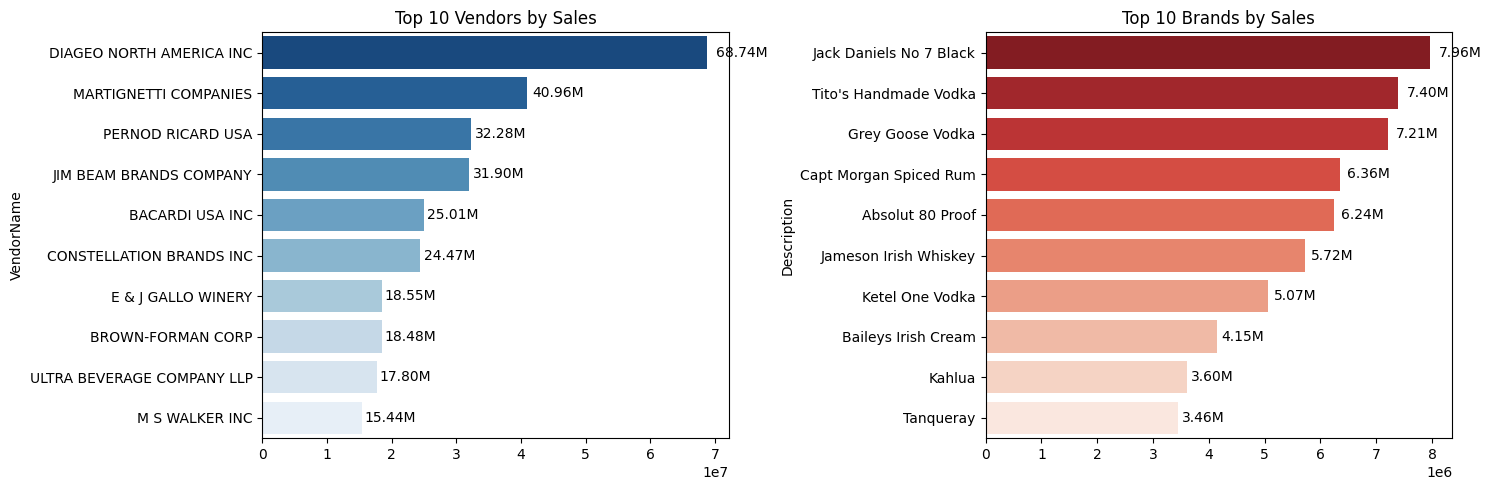

In [53]:
plt.figure(figsize=(15, 5))

# -----------------------------
# Plot for Top Vendors
# -----------------------------
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    y=top_vendors.index,
    x=top_vendors.values,
    palette="Blues_r"
)
plt.title("Top 10 Vendors by Sales")

# Add value labels on bars
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + bar.get_width() * 0.02,      # x-position
        bar.get_y() + bar.get_height() / 2,            # y-position
        format_dollars(bar.get_width()),                # formatted text
        ha='left', va='center',
        fontsize=10, color='black'
    )

# -----------------------------
# Plot for Top Brands
# -----------------------------
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    y=top_brands.index.astype(str),
    x=top_brands.values,
    palette="Reds_r"
)
plt.title("Top 10 Brands by Sales")

# Add value labels on bars
for bar in ax2.patches:
    ax2.text(
        bar.get_width() + bar.get_width() * 0.02,      # x-position
        bar.get_y() + bar.get_height() / 2,            # y-position
        format_dollars(bar.get_width()),                # formatted text
        ha='left', va='center',
        fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


In [55]:
vendor_performance= df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'Gross Profit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()


In [57]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)

top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['Gross Profit'] = top_vendors['Gross Profit'].apply(format_dollars)

top_vendors


,VendorName,TotalPurchaseDollars,Gross Profit,TotalSalesDollars
0,AAPER ALCOHOL & CHEMICAL CO,105.07,-105.07,0.0
1,ADAMBA IMPORTS INTL INC,76.77K,-9194.030000000002,67.58K
2,ALISA CARR BEVERAGES,34.95K,78.64K,113.59K
3,ALTAMAR BRANDS LLC,11.71K,4.00K,15.71K
4,AMERICAN SPIRITS EXCHANGE,1.21K,514.8099999999998,1.72K
5,AMERICAN VINTAGE BEVERAGE,156.36K,33.78K,190.13K
6,APPOLO VINEYARDS LLC,2.40K,-782.7800000000001,1.62K
7,ATLANTIC IMPORTING COMPANY,41.12K,18.16K,59.27K
8,BACARDI USA INC,17.62M,7.38M,25.01M
9,BANFI PRODUCTS CORP,1.63M,1.02M,2.65M


In [ ]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors


In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# -----------------------------
# Bar Plot → Purchase Contribution %
# -----------------------------
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['Purchase_Contribution%'],
    palette="mako",
    ax=ax1
)

# Add % labels on bars
for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(
        i, value - 1, str(value) + '%',
        ha='center', fontsize=10, color='white'
    )

# -----------------------------
# Line Plot → Cumulative Contribution %
# -----------------------------
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution %'
)

# -----------------------------
# Customize axes and labels
# -----------------------------
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# 100% reference line
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)

# Legend
ax2.legend(loc='upper right')

plt.show()


In [ ]:
print(
    f"Total Purchase Contribution of top 10 vendors is "
    f"{round(top_vendors['Purchase_Contribution%'].sum(), 2)} %"
)


In [ ]:
# Prepare values
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)

# Calculate total and remaining contribution
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# ---------------------------
# Donut Chart
# ---------------------------
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw white circle in the center → donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total contribution annotation in center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

# Title
plt.title("Top 10 Vendor's Purchase Contribution (%)")

plt.show()

# ---------------------------
# Print Total Contribution
# ---------------------------
print(
    f"Total Purchase Contribution of top 10 vendors is "
    f"{round(top_vendors['Purchase_Contribution%'].sum(), 2)} %"
)


In [ ]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']


In [ ]:
df['OrderSize'] = pd.qcut(
    df['TotalPurchaseQuantity'],
    q=3,
    labels=["Small", "Medium", "Large"]
)


In [ ]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x="OrderSize",
    y="UnitPurchasePrice",
    palette="Set2"
)

plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")

plt.show()


In [ ]:
df[df['StockTurnover'] < 1] \
    .groupby('VendorName')[['StockTurnover']] \
    .mean() \
    .sort_values(by='StockTurnover')


In [ ]:
df["UnsoldInventoryValue"] = (
    (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
)

print("Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))


In [ ]:
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"] \
                                  .sum() \
                                  .reset_index()


In [ ]:
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(
    by="UnsoldInventoryValue",
    ascending=False
)

inventory_value_per_vendor['UnsoldInventoryValue'] = \
    inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

inventory_value_per_vendor.head(10)


In [ ]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)


In [ ]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()


In [ ]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))     # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err

    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


In [ ]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")


In [ ]:
plt.figure(figsize=(12, 6))

# ----------------------------
# Top Vendors Plot
# ----------------------------
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axline(top_mean,  color="blue", linestyle="-",  label=f"Top Mean: {top_mean:.2f}")

# ----------------------------
# Low Vendors Plot
# ----------------------------
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axline(low_mean,  color="red", linestyle="-",  label=f"Low Mean: {low_mean:.2f}")

# ----------------------------
# Finalize Plot
# ----------------------------
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")
